In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w')
# Importing Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Importing Dataset using Pandas Function

df = pd.read_csv('bank.csv',sep =';')

df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3379,56,admin.,divorced,unknown,no,789,yes,no,cellular,8,may,1022,1,360,2,failure,no
2740,26,unemployed,single,secondary,no,461,no,no,cellular,28,jan,214,1,-1,0,unknown,no
2802,34,blue-collar,married,secondary,no,516,yes,yes,unknown,2,jun,26,1,-1,0,unknown,no
3996,34,management,married,secondary,no,-294,yes,no,unknown,27,may,532,2,-1,0,unknown,no
1952,41,admin.,divorced,secondary,no,6046,yes,yes,telephone,15,mar,300,6,182,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,42,blue-collar,married,primary,no,2111,yes,no,cellular,7,may,86,2,-1,0,unknown,no
2833,38,retired,single,unknown,no,62,no,no,unknown,19,jun,212,1,-1,0,unknown,no
3470,34,technician,single,secondary,no,0,yes,yes,unknown,16,may,214,1,-1,0,unknown,no
546,47,self-employed,married,secondary,yes,2,no,no,cellular,5,feb,236,2,-1,0,unknown,no


In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Evaluate Descriptive Stats: EDA

# Step 1: Segregate Categorical columns and Numeical Columns
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [5]:
# Step2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats= []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Mode':df[i].mode()[0],
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Standard Deviation':df[i].std(),
      'Variance':df[i].var(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25)

  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report



,Feature,Mean,Median,Mode,Minimum,Maximum,Standard Deviation,Variance,Skewness,Kurtosis,Q1,Q3,IQR
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,33.0,49.0,16.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,69.0,1480.0,1411.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,9.0,21.0,12.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,104.0,329.0,225.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,1.0,3.0,2.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,-1.0,-1.0,0.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


<Axes: xlabel='month', ylabel='duration'>

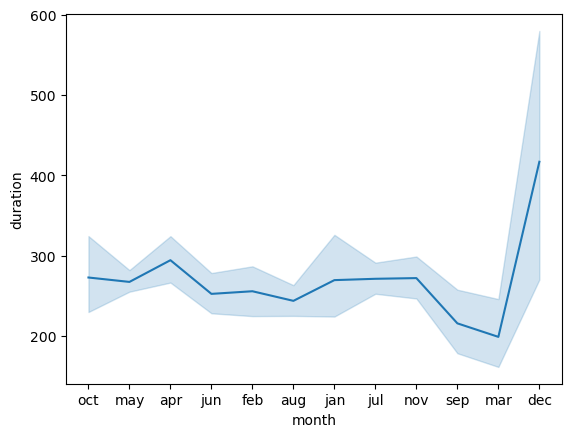

In [6]:
sns.lineplot(x = df['month'], y = df['duration'])

In [13]:
'''
1. pdays and previous these two columns shows IQR = 0, Hence we need to drop these two columns from the dataset
'''
# Create a copy of df
data = df.copy()
data.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1556,55,management,married,primary,no,229,no,yes,unknown,9,jun,175,3,-1,0,unknown,no
2237,46,services,married,secondary,no,451,yes,yes,cellular,13,may,389,4,-1,0,unknown,no
4406,35,unemployed,single,secondary,no,2116,yes,no,cellular,13,may,409,2,-1,0,unknown,no
2636,47,services,divorced,secondary,no,4906,yes,no,unknown,14,may,389,1,-1,0,unknown,no
3135,48,management,married,tertiary,no,1808,yes,no,cellular,26,feb,245,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,46,blue-collar,married,secondary,no,494,yes,no,unknown,26,may,724,1,-1,0,unknown,no
877,30,management,single,tertiary,no,19358,no,no,cellular,19,nov,258,2,-1,0,unknown,no
1093,30,management,single,tertiary,no,-218,yes,no,cellular,27,aug,13,15,-1,0,unknown,no
1478,35,technician,single,tertiary,no,7546,yes,no,cellular,28,dec,137,1,122,3,failure,no


In [15]:
# Encoding Using get_dummies method
'''
Obeservation:
1. The Number of columns are increased, which impact badly w.r.t Model Building
'''
data = pd.get_dummies(data,drop_first = True, dtype = 'int')

In [17]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# Encoding Technique: : Label Encoder

'''
1.Independent Coumns can be encoded directly using Labelencoder
2. target column must be decoded seprately either by using replace function or map function
'''
preprocess_data = df.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Transforming all Categorical Columns: Independent columns

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Transform Target Column to Numerical 

df['y'] = df['y'].replace({'yes':1, 'no':0})

In [47]:
# Concept of Data Leackage
'''
Step 1: Split the dataset into X and y
       X : Independent Columns
       y : Target Columns

Step 2: Split the data into train and test
        train data: Seen Data
        test data : Unseen Data

Step 3: Try balance the target column in case of classification problem
        Imbalance Technique : 1. Oversampling 2. Undersampling

Step 4: Use scaling Technique:
        MinMaxScaler
        RobustScaler
        StandardScaler

Step 5: Model Building
'''

# Step 1: Split the dataset into X and y

X = df.drop(columns = ['pdays','previous', 'y'],axis = 1)
y = df['y']

# Step 2: Split the Dataset into Train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

# Step 3: Balancing the Target Column
from imblearn.over_sampling import SMOTE,ADASYN,SMOTEN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,AllKNN

sm= ClusterCentroids(random_state= 42)
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

# Step 4: Scaling Techniques

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [49]:
#Logistic regression model
'''
classification problem are of two type
1.binary classification:signmoid functionn
2.multiclass classification:softmax function
'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr= lr.predict(X_test)
print(f'the accuracy score for logistic regression',accuracy_score(y_test,y_pred_lr))

the accuracy score for logistic regression 0.4016212232866618


In [71]:
# Tree based Algorithm:

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print(f'The Accuracy score for decision tree: {accuracy_score(y_test, y_pred_DT)}')

The Accuracy score for decision tree: 0.31319086219602066


In [73]:
# RandomForest Classifier

from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier().fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

print(f'The Accuracy score for SGD Classifier: {accuracy_score(y_test, y_pred_sgd)}')

The Accuracy score for SGD Classifier: 0.2778187177597642


In [75]:
#XGBClassifier 
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f'The Accuracy score for Gradient Boosting Classifier: {accuracy_score(y_test, y_pred_xgb)}')

The Accuracy score for Gradient Boosting Classifier: 0.2468680913780398
